# Introduction
L’objectif de ce travail est d’évaluer la probabilité de ruine en temps fini d'une compagnie d'assurance. On modélise alors la richése détenue par l'assurance au temps t par:

$$R_t=u+ct-S_t$$
Ou 

+  $u\geq0$: La richésse initiale de l'assureur.

+ $c\geq0$: Taux instantané de prime.

+ $S_t=\sum_{i=1}^{N_t}X_i$.

+ $X_i$ Montant du i-éme sinistre qui suit une loi de pobabilité, de fonction de répartition $F$.

+ $N_t$: Un processus de poisson.

On défini alors les probalités de ruine et de survie a horizon fini:
$$\Psi(u,T)=\mathbf{P}\left(\underset{0\leq t \leq T}{\text{inf}}R_t<0\mid R_0=u\right)=1-\Phi(u,T)$$
On va voir dans la suite trois méthode pour approcher la probabilité de survie de l'assurance, en premier lieu une methode de type Monte Carlo, en suite on va approcher la probabilité en résolvant une équation  de transport, et finalement on approchera les lois marginales de la probabilité de survie à différents horizons et notament l'horizon T=1.

# Méthode Monte-Carlo

L'idée dériere est de voir la probabilité de survie de la manière suivante:
$$\Phi(u,T)=\mathbb{P}\left(\underset{0\leq t \leq T}{\text{inf}}R_t\geq0\mid R_0=u\right)=\mathbb{E}\left[\mathbb{1}_{\{\underset{0\leq t \leq T}{\text{inf}}R_t\geq0\}}\mid R_0=u\right]$$
On approche alors la probabilité de survie, en utilisant l'échatillon $\left(R_t^1,R_t^2,...,R_t^{n'}\right)$, $n'$ trajéctoires du processus que suit la richèsse et toutes valant $u$ à l'intant $t=0$. 

On approxime alors la probabilité de survie par la moyenne:
$$S_{n'}=\frac{1}{n'}\sum_{i=1}^{n'}\mathbb{1}_{\{\underset{0\leq t \leq T}{\text{inf}}R_t^i\geq0\}}$$



## Résultats numériques

**Remarque:** Les méthodes Monte Carlo nous donnent à la fois les prédictions ainsi que les intervales de confiance. On approche la variance des estimations par:
$$\sigma^2_{n'}=\frac{1}{n'-1}\sum_{i=1}^{n'}\left(\mathbb{1}_{\{\underset{0\leq t \leq T}{\text{inf}}R_t^i\geq0\}}-S_{n'}\right)^2$$

Et  on estime l'intérval de confiance à $95\% $ par:
$$I=\left[S_{n'}-\frac{1.96\sigma_{n'}}{\sqrt{n'}} \text{ , } S_{n'}+\frac{1.96\sigma_{n'}}{\sqrt{n'}}\right]$$

Le choix sur le coup des sinistre a était simuler selon \textit{la loi exponentielle, la loi de Pareto} et \textit{ la loi géométrique}. On obtient alors les résultats numériques suivants pour la probabilité de survie de l'assurance:



+Pour des sinistres de coût selon *la loi géométrique* de paramètres $p=0.9$:

La probabilité de survie est 0.78279, avec un intervale de confiance à 95\% $ [ 0.780234 , 0.78534]$



+ Pour des sinistres de coût selon *la loi exponentielle* de paramètre $\mu=1$: 

La probabilité de survie est 0.698, avec un intervale de confiance à 95\% $ [ 0.6955 , 0.7011 ]$



+Pour des sinistres de coût selon *la loi de Pareto* de paramètres $a=3,b=3$:

La probabilité de survie est 0.552, avec un intervale de confiance à 95\% $[ 0.5490, 0.5552]$









In [90]:
import numpy as np
import matplotlib.pyplot as plt
from random import random
import math
from math import exp


n = 100000
a=3
b=3.
to=0.8
  #richesse initiale
t_final = 1.
lambdaa = 5.
mu = 1
Ee=1./mu
Eg=1/0.9
Ep=a*b/(b-1)
cp =  (1+to)*lambdaa*Ee#lambdaa*Ee-(lambdaa*Ee/1.5)#1. #montant des primes d'assurances, Le 'to' est expliqué dans la derniére partie
#cp=(1+to)*lambdaa*Ep

u_ini =Ee


survie = []
U=[]
for _ in range(n):
    
    u = u_ini
    T = -np.log(random())/lambdaa
    t = T
    while u>=0 and t<t_final:
        
        S =-np.log(random())/mu#np.random.geometric(0.9)#b/(np.random.uniform()**(1/a))#-np.log(random())/mu
        u += cp*T-S
        T = -np.log(random())/lambdaa 
        t += T
    if u>=0.:
        survie.append(1)
    else:
        survie.append(0)

moy=np.mean(survie)
print(np.mean(survie))

var=[(survie[i]-moy)**2 for i in range(len(survie))]

V=np.sum(var)/(n-1)

ecart = 1.96*math.sqrt(V/n)

print(moy,V,'[',moy-ecart,',',moy+ecart,']')



0.67902
0.67902 0.2179540191401914 [ 0.6761263998895338 , 0.6819136001104661 ]


## Convergence vers la probabilité de survie

Les graphiques suivants illustrent la convergence de $S_{n'}$ vers $\Phi(u,T)$ quand $n'$ tend vers l'infini.


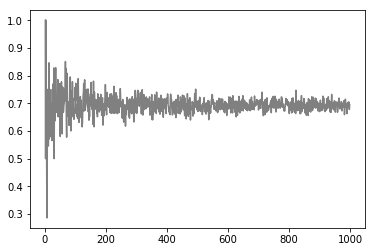

In [24]:

# a=3
# b=3.
# to=0.9
#   #richesse initiale
# t_final = 1.
# lambdaa = 5.
# mu = 1
# Ee=1./mu
# Eg=1/0.9
# Ep=a*b/(b-1)
c =  (1+to)*lambdaa*Ee#lambdaa*Ee-(lambdaa*Ee/1.5)#1. #montant des primes d'assurances


u_ini =Ee



def cnv(n):
    
        
    survie = []
    for i in range(n):
        
        u = u_ini
        T = -np.log(random())/lambdaa
        t = T
        while u>=0 and t<t_final:
            
            S = np.random.geometric(0.9)#♣b/(random()**(1/a))-np.log(random())/mu
            u += c*T-S
            T = -np.log(random())/lambdaa 
            t += T
        if u>=0.:
            survie.append(1)
        else:
            survie.append(0)
    return(np.mean(survie))


N=[n for n in range(1000)]
P=[cnv(N[i]) for i in range(1000) ]
plt.plot(P,'grey')

# méthode déterministe
On peut montrer que la probabilité de survie est solution de l'equation de transfert suivante:
$$\partial_t\Phi(u,t)=c\partial_u\Phi(u,t)-\lambda\Phi(u,t)+\lambda\int_0^u\Phi(u-y,t)dF(y) \text{  } (1)$$
On va alors faire une approche détérministe pour éstimer la probabilitée de survie
## Discrétisation de type volumes finis
On présente alors le schéma discrétisé de l'équation précèdante
$$\Phi^{n+1}_i=\Phi^n_{i+1}-\lambda\delta t\Phi^n_i+\lambda\delta t\sum_{j=1}^{i-1}\Phi^n_{i-1-j}\left(F\left((j+1)\delta u\right)-F(j\delta u)\right)$$
Avec $\Phi^n_i$ : l'approximation au temps $n\delta t$ de $\Phi$ sur l'ouvert $ ]i\delta u ,(i+1)\delta u[$, avec la condition $\delta t=c\delta u$.
## Application numériques
Pour faire une comparaison avec la méthode Monte-Carlo, on s'intérèsse à $\Phi^N(u_0)$.

Avec $\Phi^N(u_0)$, l'approximation de $\Phi$ sur l'ouvert qui contient $u_0$ à l'instant finale.

## Résultats numériques
On prenant les même condition qu'avant, on trouve les résultats suivants pour les trois types de coût:

*Loi exponentielle*: 0.6828

*Loi de Pareto*: 0.557

*Loi géométrique*: 0.7785



In [58]:
Ee


1.0

8 621
6.21 0.6650452510918758


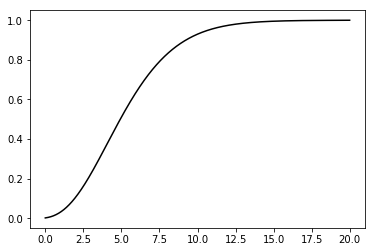

In [93]:
# to=0.9
# Ee=1./mu
# Eg=1/0.9
# Ep=a*b/(b-1)
# lambdaa=5

N = 2000
deltau = .01
# c = 1.



deltat = c*deltau
phi = [1. for _ in range(N)]
lambd = 5.
lambdt = lambd*deltat
X = [(i+0.)*deltau for i in range(N)]
mu = 1.
dF = [lambdt*( exp(-mu*X[i]) - exp(-mu*X[i+1])) for i in range(N-1)]
dFp = [lambdt*( 0.1**X[i] - 0.1**X[i+1]) for i in range(N-1)]




t = 0.

while t<t_final:
    t+= deltat
    phin = phi.copy()
    for i in range(N-1):
        phi[i] = phin[i+1] - lambdt*phin[i] + sum([phin[i-j-1]*dF[j] for j in range(i)])
    #plt.plot(X,phi)
    
#plt.show()
#print(phi)
xx=0
pos=[]
i=0
while(i<len(X)):
    #print(int(X[i])-int(u_ini))
    if (int(abs(X[i]-c*to))==0):
        xx=X[i]
        pos.append(i)
    i=i+1

    
print(int(xx),pos[0])
print(X[pos[0]],phi[pos[0]])
plt.plot(X,phi,'black') 
plt.show()    
    
#print(X)

100.0

# Approximation des mesures marginales

Soit $t\geq0$, $\mu_t$ une mesure de probabilité sur $\mathbb{R}_+$ et telle que :
$$\mathbb{P}\left(R_t>0\right)=\int_{\mathbb{R}_+}d\mu_t$$
Soit $E\in\mathcal{P}(\mathbb{R}_+)$ une partie mesurable, on a alors
\begin{align*}
\mathbb{P}\left(R_{t+h}\in E\right) &= \mathbb{P}(N_{t+h}-N_t=0)\mathbb{P}\left(R_{t}\in \tau_{-ch}(E)\right)+\mathbb{P}(N_{t+h}-N_t=1)\mathbb{P}\left(R_{t+h}\in \tau_{X}(E),X\right) \\
&=(1-\lambda h)\mathbb{P}\left(R_{t}\in \tau_{-ch}(E)\right)+\lambda h\mathbb{P}\left(R_{t+h}\in \tau_{X}(E),X\right)  
\end{align*}
Ou $\tau_{_{-ch}}(E):=\{r\in\mathbb{R} \text{ ; } r+ch\in E\}$ et $X$ suit la même loi du montant des sinistres.\\

On peut voir alors que
$$\int_{\mathbb{R}_+}\mathbf{1}_E(s)d\mu_{t+h}(s)=(1-\lambda h)\int_{\mathbb{R}_+}\mathbf{1}_E(s+ch)d\mu_{t}(s)+\lambda h \int_{\mathbb{R}}\int_{\mathbb{R}_+}\mathbf{1}_E(s-u)d\mu_{t}(s)dF(y)$$



Soit $(E_i)_{i\geq0}$ une partition de $[0 , N]$, et $\phi\in\mathcal{C}_c^1(\mathbb{R})$ telle que $\phi=\sum_{i\in I}\phi_i\mathbf{1}_{E_i}$, avec $(\phi_i)_{i\in I}$ des fonctions telles que $\forall i \in I$, $\phi_i\in\mathcal{C}_c^1(\mathbb{R})$. On a alors, en faisant tendre $h$ vers $0$
$$\partial_t\int_{\mathbb{R}_+}\phi(s)d\mu_{t}(s)=c\int_{\mathbb{R}_+}\phi'(s)d\mu_{t}(s)-\lambda\int_{\mathbb{R}_+}\phi(s)d\mu_{t}(s)+\lambda\int_{\mathbb{R}}\int_{\mathbb{R}_+}\phi(s-y)d\mu_{t}(s)dF(y)\text{  } (2)$$
Et $d\mu_0=\delta_u$


*Remarque:* $\mu_.(.)$ est alors solution faible de l'équation (1)

## Schéma de Volumes finis pour approcher $\mu$
Au temps $t_n=\frac{nh}{c}$, on approche  $d\mu_{t_n}$ par une densité constante par morceaux $(U^n_i)_{i\in\mathbb{N}}$. 

On a alors pour $i \in \mathbb{N}$ et $t\in\left](n-1)\frac{h}{c} \text{ , } n\frac{h}{c}\right]$
$$U_i^n\cong \frac{1}{h}\int_{ih}^{(i+1)h}d\mu t=\frac{1}{h}\mathbb{P}\left(R_t\in[ih , (i+1)h[\right)$$
Donc
$$h\sum_{i\in\mathbb{N}}U_i^n\cong \sum_{i\in\mathbb{N}}\int_{ih}^{(i+1)h}d\mu t=\int_{\mathbb{R}_+}d\mu_t=\mathbb{P}\left(R_t>0\right)$$
La discretisation de l'équation (2) se fait de la manière suivante:
### Initialisation en temps
Au temps $t_0=0$ on approche $d\mu_0=\delta_u$ par $(U_i^0)_{i\in\mathbb{N}}$, ou pour $i\in\mathbb{N}$
$$U_i^0=\frac{u_0}{h}\mathbf{1}_{\{u_0\in[ih , (i+1)h[\}}$$
### Avancement temporel
On utilise le schéma suivant pour les pas de temps: Pour $n\geq 0$
$$U^{n+1}_i=\frac{1}{1+\delta t}\left(U_{i-1}^n+\delta t \lambda\sum_{j\in\mathbb{N}}U^n_{i+j}(F((j+1)h)-F(jh))\right)$$
## Résultats numériques:
On obtient une probabilité de survie pour les trois types de sinistres:


*Loi exponentielle*: 0.6971

*Loi de Pareto* :0.5496

*Loi géométrique*: 0.7862


In [ ]:
deltau = .025 #le pas de la discretisation des richeses initiales X
c = 1.
tfinal = 10.                     # horizon avant ruine
uini = 4.                       # richese initiale
iini = int(uini/deltau)    # u/h
deltat = c*deltau       #pas de temps
N = iini+ int( tfinal/deltat)+2 # 

u = [0. for _ in range(N)]    # mesure discrete

u[iini] = 1./deltau   # initialisation pout t=0

lambd = 1.
lambdt = lambd*deltat
uplambdt = 1./(1. + lambdt ) 

X = [i*deltau for i in range(N+2)] #discretisation de l'espace oracle
mu = 1.
dF = [lambdt*( exp(-mu*X[i]) - exp(-mu*X[i+1])) for i in range(N+1)]

Xplot = X[0:N]

t = 0.
Nmax = iini+1 #condition  <
j=0
conv=[]
while t<tfinal:
    t+= deltat
    Nmax +=1
    un = u.copy()
    i=0
    
    u[i] = uplambdt * sum([un[i+j]*dF[j] for j in range(Nmax-i)])
    
    for i in range(Nmax):

        u[i] = uplambdt * (un[i-1]  + sum([un[i+j]*dF[j] for j in range(Nmax-i)]))
        
       # phi[i] = phin[i+1] - lambdt*phin[i] + sum([phin[i-j-1]*dF[j] for j in range(i)])
   
    if(j%10==0): 
        if( 200<j<400 ):

            plt.plot(Xplot,[i*1 for i in u])
            #/print(u)
     #print(sum(u)*deltau)
    j=j+1
    conv.append(sum(u)*deltau)

plt.show()
print(" survie ",sum(u)*deltau)

plt.plot(Xplot,u)    
plt.show()

## Taux de profit

L'ésperance du processus $(R_t-u_0)_{t\geq0}$ est linéaire en fonction de $t$, en effet

\begin{align*}
\mathbb{E}\left[R_t-u_0\right]&=ct-\mathbb{E}[N_t]\mathbb{E}[X]\\
&=(c-\lambda\mathbb{E}[X])\\
&=pt
\end{align*}
Le coefficient relatif de sécurité est le rapport du profit et du risque par unité de temps, que  l’on rapporte au risque par unité de temps :

$$\theta=\frac{c-\lambda\mathbb{E}[X]}{\lambda\mathbb{E}[X]}=\frac{p}{\lambda\mathbb{E}[X]}$$

Le taux des primes pourrait etre décomposé de la manière suivante :

$$c =\mathbb{E}[S_T] + p = (1 + \theta)\lambda\mathbb{E}[X]$$

Si le taux de profit $p=cT-\mathbb{E}[S_T]=c-\lambda\mathbb{E}[X]$ est négatif \textit{($\theta\in]-1,0]$)}, alors la ruine de la compagnie est certaine, le cas le plus pratique est donc quand le taux de profit est positif.
## Application numérique
On prend alors $\theta\in]-1,1[$  et on regarde la probabilité de survie dans les trois types de sinistres en fonction de $\theta$


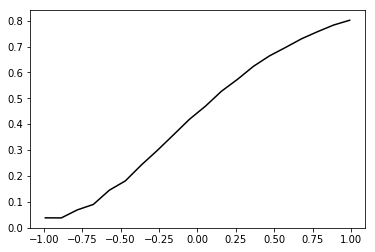

In [94]:
def theta():
    
    Te=np.linspace(-0.99,0.99,20)
    n = 100000
    #to=-0.99
      #richesse initiale
    t_final = 1.
    lambdaa = 5.
    mu = 1.5
    Ee=1./mu
   
    a=3
    b=3.
    Ep=a*b/(b-1)
    Eg=1/0.9
    u_ini =Eg
    P=[]
    for t in Te:
        c =(1+t)*lambdaa*Eg# (1+t)*lambdaa*Ee#lambdaa*Ee-(lambdaa*Ee/1.5)#1. #montant des primes d'assurances
        
        survie = []
        

        for _ in range(n):
            
            u = u_ini
            T = -np.log(random())/lambdaa
            t = T
            while u>=0 and t<t_final:
                
                S =np.random.geometric(0.9)#-np.log(random())/mu# b/(np.random.uniform()**(1/a))#-np.log(random())/mu
                u += c*T-S
                T = -np.log(random())/lambdaa 
                t += T
            if u>=0.:
                survie.append(1)
            else:
                survie.append(0)
                
        P.append(np.mean(survie))
         
    return(Te,P)      
 
                     
(T,P)=theta()          
            
plt.plot(T,P,'black')          